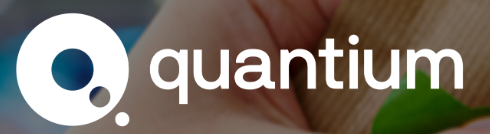

# Data preparation and customer analytics
- Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.
- Client, the Category Manager for Chips, wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region. The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.
- We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  
    - LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.
    - PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns 
import pandas_profiling as pp

## import dataset

#### transacton data: 

In [41]:
txn = pd.read_excel('QVI_transaction_data.xlsx')

In [42]:
txn.head() 

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0           Natural Chip Compny SeaSalt175g         2        6.0  
1                     CCs Nacho Cheese 175g         3        6.3  
2     Smiths Crinkle Cut Chips Chicken 170g         2        2.9  
3     Smiths Chip Thinly S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [43]:
pp.ProfileReport(txn)

- No missing values in the dataset. 


### Data Prep

In [44]:
txn.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

- LYLTY_CARD_NBR and TXN_ID should be converted to object since they are unique IDs. 
- From DATE we can obtain granular level data. Day, mnth, week. 

In [45]:
txn['STORE_NBR'] = txn['STORE_NBR'].astype('object')

In [46]:
txn['TXN_ID'] = txn['TXN_ID'].astype('object')

In [47]:
# Date: 
txn['day'] = txn['DATE'].apply(lambda x:x.day_name())

In [48]:
# Month 
txn['month'] = txn['DATE'].apply(lambda x:x.month_name())

In [49]:
txn['year'] = txn['DATE'].dt.year

In [50]:
txn['week'] = txn['DATE'].dt.weekofyear

In [51]:
# Creating unit price: 
txn['unit_price'] = txn['TOT_SALES']/txn['PROD_QTY']

In [52]:
# Extracting the package size from product name: 
txn['size'] =txn['PROD_NAME'].str.extract('(\d+)').astype(int)

In [53]:
# Extracting brand name: 
new = txn['PROD_NAME'].str.split(' ', n = 1 , expand=True)

In [54]:
txn['brand'] = new[0]

In [55]:
txn['brand'] = txn['brand'].replace({'Natural':'Natural Chip Compny'})

In [56]:
# Flavours: 
new1 = txn['PROD_NAME'].str.split(' ', n = 3, expand = True)

new1

txn['flavour'] = new1[1] + new1[2] + new1[3]
txn['flavour'] = txn['flavour'].str.extract('(\D+)').astype('object')
# txn['flavour'] = txn['flavour'].str.strip()

In [57]:
txn['flavour'].value_counts()

HoneySoyChicken                  4661
MozzarellaBasil& Pesto           3304
TortillaChpsHny&JlpnoChili       3296
PopdSwt/Chlli&Sr/Cream Chips     3269
CrispsChed& Chives               3268
                                 ... 
PcSeaSalt                        1431
MediumSalsa                      1430
SourCream& Garden Chives         1419
FriesPotatoChips                 1418
CrinkleCutOriginal               1410
Name: flavour, Length: 103, dtype: int64

In [58]:
txn['flavour'] = txn['flavour'].replace({'ChipCompnySeaSalt':'Sea salt'})

In [59]:
txn.head()

DATE STORE_NBR  LYLTY_CARD_NBR TXN_ID  PROD_NBR  \
0 2018-10-17         1            1000      1         5   
1 2019-05-14         1            1307    348        66   
2 2019-05-20         1            1343    383        61   
3 2018-08-17         2            2373    974        69   
4 2018-08-18         2            2426   1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES        day  \
0           Natural Chip Compny SeaSalt175g         2        6.0  Wednesday   
1                     CCs Nacho Cheese 175g         3        6.3    Tuesday   
2     Smiths Crinkle Cut Chips Chicken 170g         2        2.9     Monday   
3     Smiths Chip Thinly S/Cream&Onion 175g         5       15.0     Friday   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   Saturday   

     month  year  week  unit_price  size                brand  \
0  October  2018    42        3.00   175  Natural Chip Compny   
1      May  2019    20        2.10   175                  CCs   
2      May  2019    21        1.45   170               Smiths   
3   August  2018    33        3.00   175               Smiths   
4   August  2018    33        4.60   150               Kettle   

                       flavour  
0                     Sea salt  
1                  NachoCheese  
2     CrinkleCutChips Chicken   
3     ChipThinlyS/Cream&Onion   
4  TortillaChpsHny&JlpnoChili

##### Data cleaned
___

## Customer demograhics

In [60]:
cus = pd.read_csv('QVI_purchase_behaviour.csv')

In [61]:
cus.head() 

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

### Exploration and Data Prep

In [62]:
pp.ProfileReport(cus)

- No missing values. 
- Convert loyalty number to object

In [63]:
cus['LYLTY_CARD_NBR'] = cus['LYLTY_CARD_NBR'].astype('object')

In [64]:
cus.dtypes

LYLTY_CARD_NBR      object
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

## Merge the two datasets based on the Loyalty Card number. 

In [65]:
df = txn.merge(cus, how = 'left', on = 'LYLTY_CARD_NBR' )

In [66]:
df.shape

(264836, 18)

In [67]:
df.head() 

DATE STORE_NBR LYLTY_CARD_NBR TXN_ID  PROD_NBR  \
0 2018-10-17         1           1000      1         5   
1 2019-05-14         1           1307    348        66   
2 2019-05-20         1           1343    383        61   
3 2018-08-17         2           2373    974        69   
4 2018-08-18         2           2426   1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES        day  \
0           Natural Chip Compny SeaSalt175g         2        6.0  Wednesday   
1                     CCs Nacho Cheese 175g         3        6.3    Tuesday   
2     Smiths Crinkle Cut Chips Chicken 170g         2        2.9     Monday   
3     Smiths Chip Thinly S/Cream&Onion 175g         5       15.0     Friday   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   Saturday   

     month  year  week  unit_price  size                brand  \
0  October  2018    42        3.00   175  Natural Chip Compny   
1      May  2019    20        2.10   175                  CCs   
2      May  2019    21        1.45   170               Smiths   
3   August  2018    33        3.00   175               Smiths   
4   August  2018    33        4.60   150               Kettle   

                       flavour               LIFESTAGE PREMIUM_CUSTOMER  
0                     Sea salt   YOUNG SINGLES/COUPLES          Premium  
1                  NachoCheese  MIDAGE SINGLES/COUPLES           Budget  
2     CrinkleCutChips Chicken   MIDAGE SINGLES/COUPLES           Budget  
3     ChipThinlyS/Cream&Onion   MIDAGE SINGLES/COUPLES           Budget  
4  TortillaChpsHny&JlpnoChili   MIDAGE SINGLES/COUPLES           Budget

## Profiling

In [68]:
df['STORE_NBR'] = df['STORE_NBR'].astype('object')

In [69]:
df['TXN_ID'] = df['TXN_ID'].astype('object')

In [70]:
df['year'] = df['year'].astype('object')
df['PROD_NBR'] = df['PROD_NBR'].astype('object')

In [71]:
df['LYLTY_CARD_NBR'] = df['LYLTY_CARD_NBR'].astype('object')

In [72]:
df.dtypes

DATE                datetime64[ns]
STORE_NBR                   object
LYLTY_CARD_NBR              object
TXN_ID                      object
PROD_NBR                    object
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
day                         object
month                       object
year                        object
week                         int64
unit_price                 float64
size                         int32
brand                       object
flavour                     object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

### Univariate analysis: 


In [73]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    std = data[i].std()
     

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.distplot(data[i], kde=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 14)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; std = {}; range = {}\nmean = {}; median = {})'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2), round(std),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

C:\Users\akilm\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


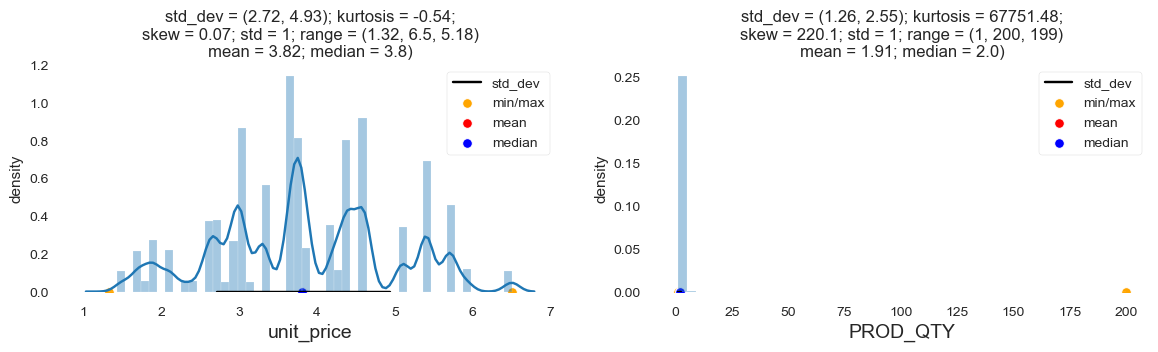

In [74]:
UVA_numeric(df, ['unit_price', 'PROD_QTY'])

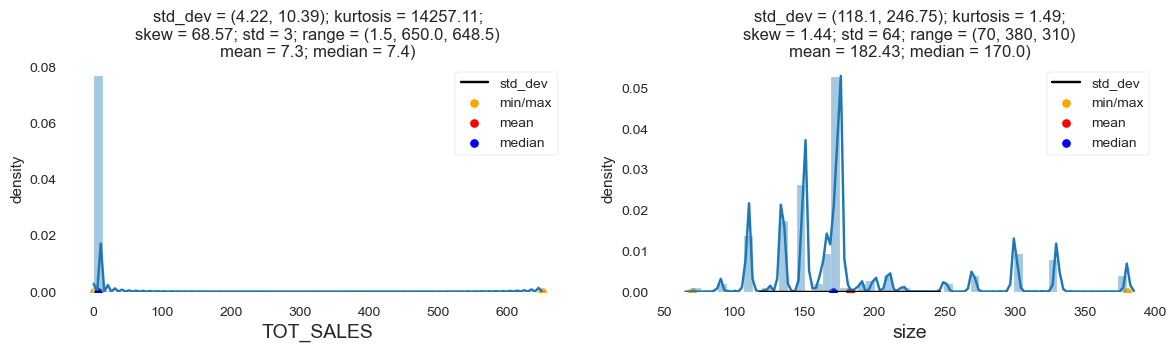

In [75]:
UVA_numeric(df, ['TOT_SALES', 'size'])

### Categorical

In [76]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,4), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 90)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

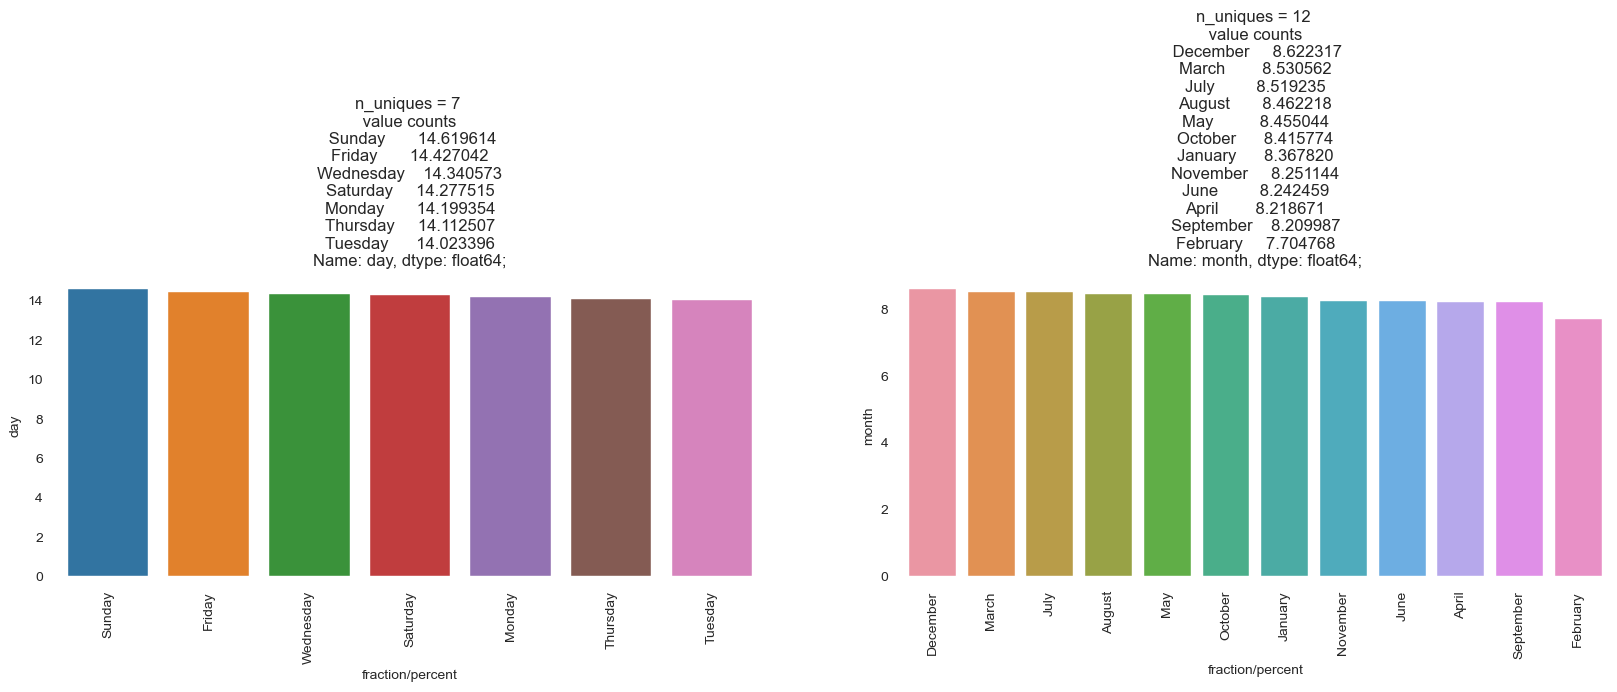

In [77]:
UVA_category(df, ['day','month'])

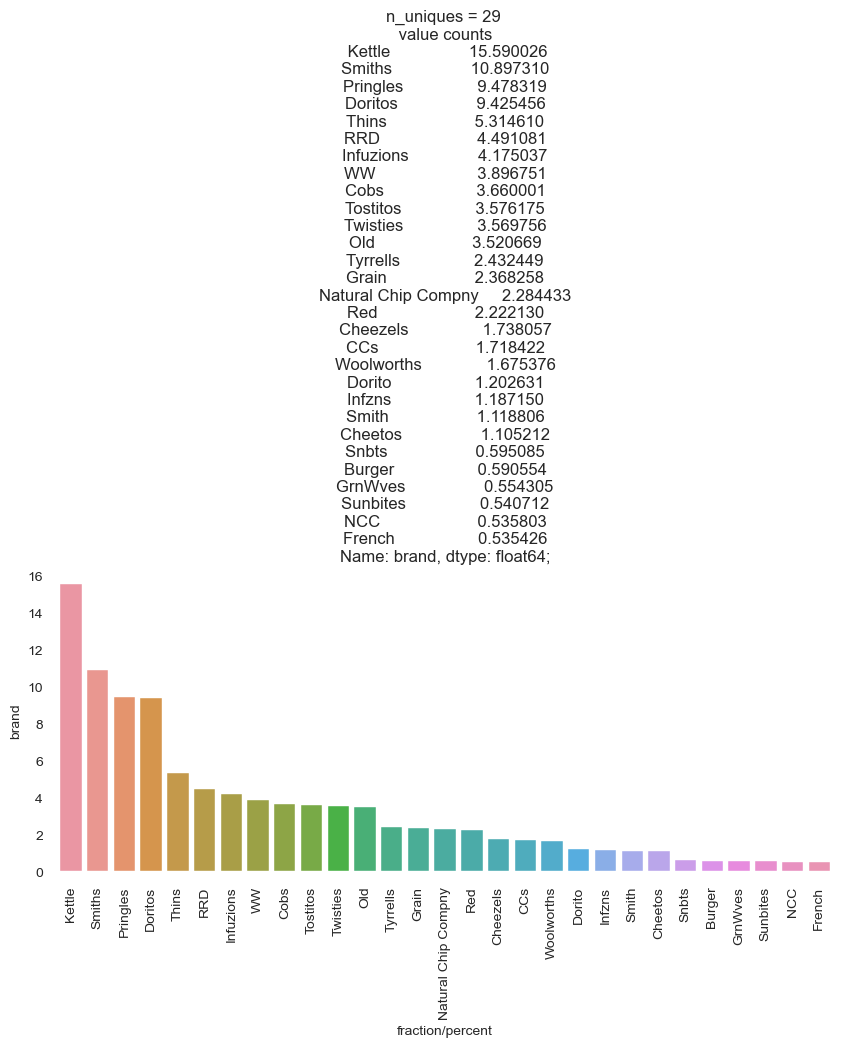

In [78]:
UVA_category(df, ['brand'])

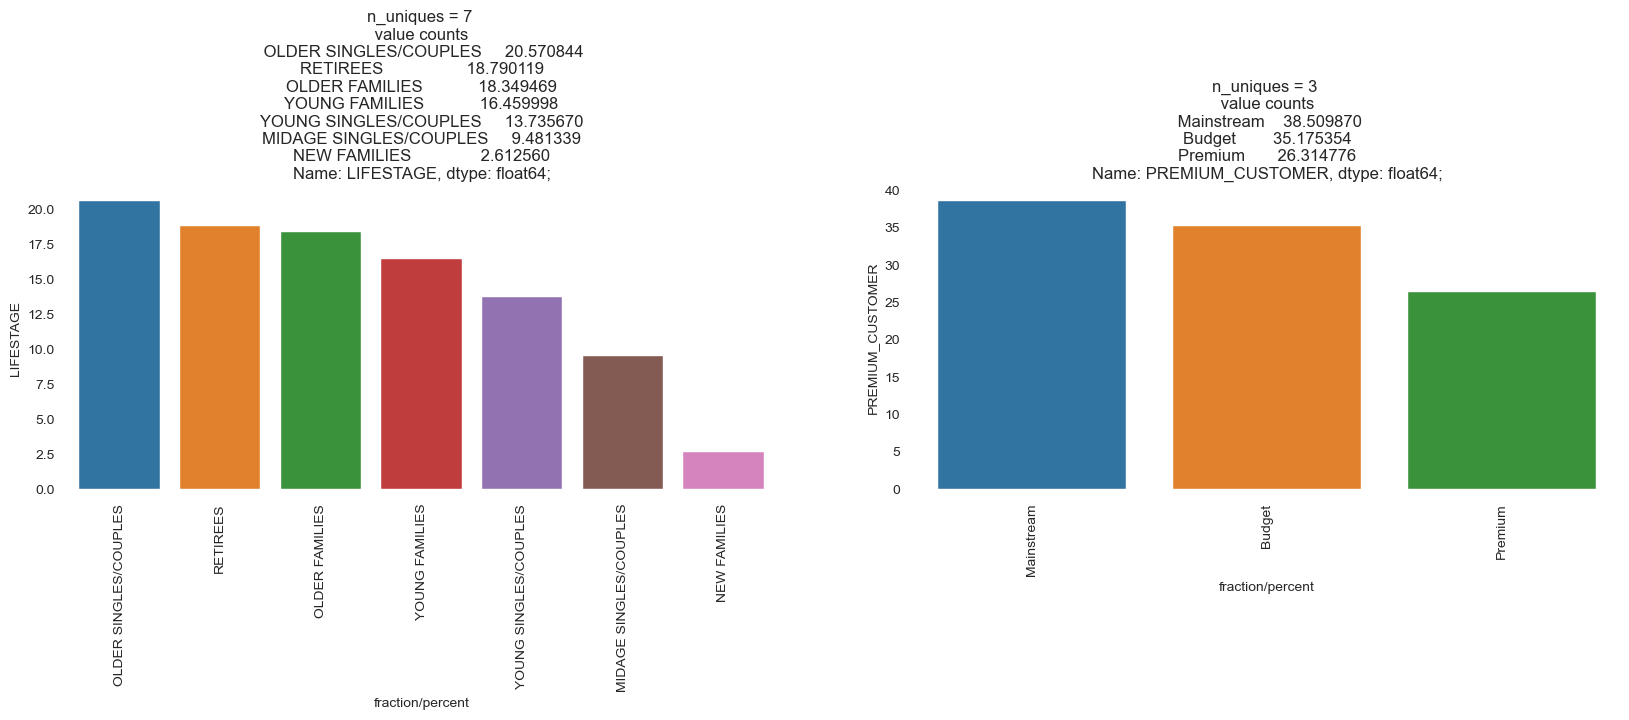

In [79]:
UVA_category(df, ['LIFESTAGE','PREMIUM_CUSTOMER'])

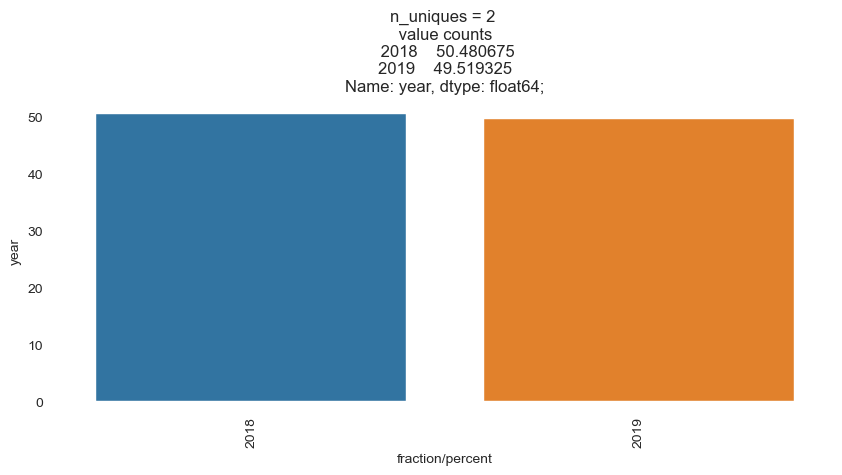

In [80]:
UVA_category(df, ['year'])

In [81]:
df.head()

DATE STORE_NBR LYLTY_CARD_NBR TXN_ID PROD_NBR  \
0 2018-10-17         1           1000      1        5   
1 2019-05-14         1           1307    348       66   
2 2019-05-20         1           1343    383       61   
3 2018-08-17         2           2373    974       69   
4 2018-08-18         2           2426   1038      108   

                                  PROD_NAME  PROD_QTY  TOT_SALES        day  \
0           Natural Chip Compny SeaSalt175g         2        6.0  Wednesday   
1                     CCs Nacho Cheese 175g         3        6.3    Tuesday   
2     Smiths Crinkle Cut Chips Chicken 170g         2        2.9     Monday   
3     Smiths Chip Thinly S/Cream&Onion 175g         5       15.0     Friday   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   Saturday   

     month  year  week  unit_price  size                brand  \
0  October  2018    42        3.00   175  Natural Chip Compny   
1      May  2019    20        2.10   175                  CCs   
2      May  2019    21        1.45   170               Smiths   
3   August  2018    33        3.00   175               Smiths   
4   August  2018    33        4.60   150               Kettle   

                       flavour               LIFESTAGE PREMIUM_CUSTOMER  
0                     Sea salt   YOUNG SINGLES/COUPLES          Premium  
1                  NachoCheese  MIDAGE SINGLES/COUPLES           Budget  
2     CrinkleCutChips Chicken   MIDAGE SINGLES/COUPLES           Budget  
3     ChipThinlyS/Cream&Onion   MIDAGE SINGLES/COUPLES           Budget  
4  TortillaChpsHny&JlpnoChili   MIDAGE SINGLES/COUPLES           Budget

### Outlier treatment

#### Total sales

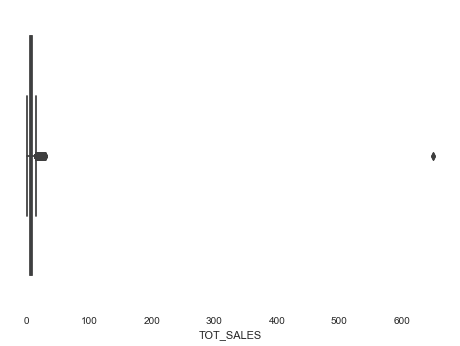

In [82]:
sns.boxplot(df['TOT_SALES'])

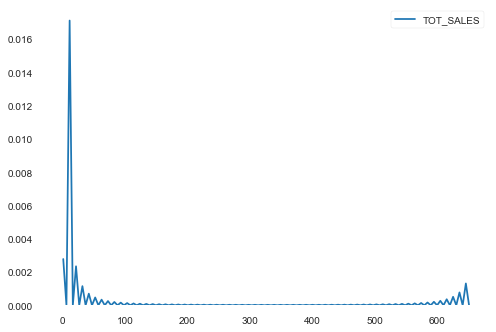

In [83]:
sns.kdeplot(df['TOT_SALES'])

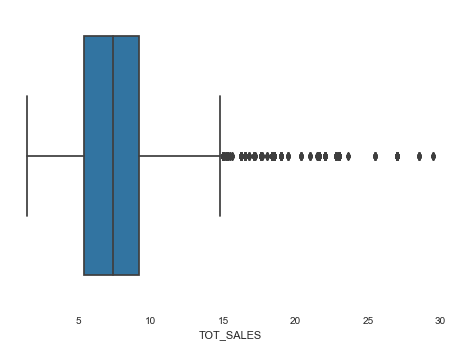

In [84]:
df_ot = df[df['TOT_SALES'] < df.TOT_SALES.max()]
sns.boxplot(df_ot['TOT_SALES'])

In [85]:
df_ot['TOT_SALES'].describe() # before outlier removal 

count    264834.000000
mean          7.299346
std           2.527241
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max          29.500000
Name: TOT_SALES, dtype: float64

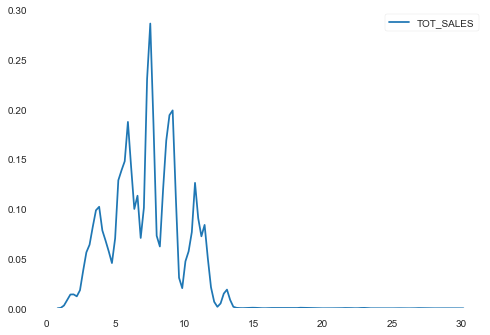

In [86]:
sns.kdeplot(df_ot['TOT_SALES'])

In [87]:
df_ot['TOT_SALES'].describe() # After outlier removal 

count    264834.000000
mean          7.299346
std           2.527241
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max          29.500000
Name: TOT_SALES, dtype: float64

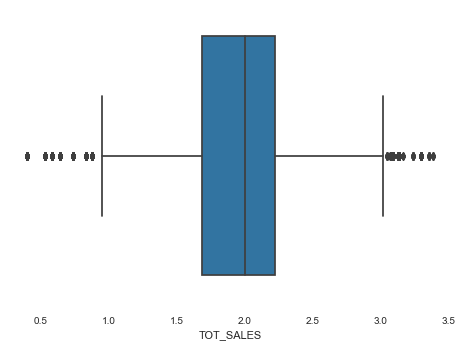

In [88]:
# Transforming the TOTAL SALES: 
sns.boxplot(np.log(df_ot.TOT_SALES))

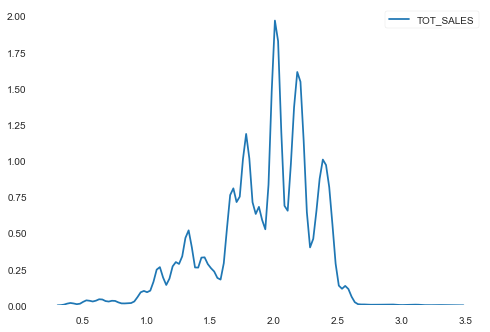

In [89]:
sns.kdeplot(np.log(df_ot['TOT_SALES'])); # 

#### size

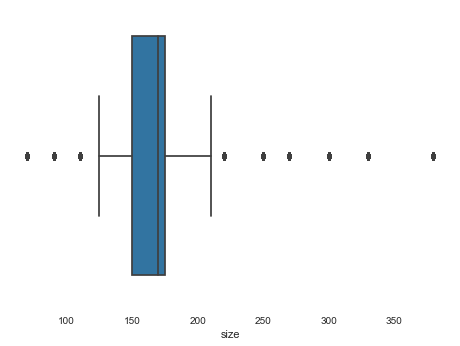

In [90]:
sns.boxplot(df['size'])

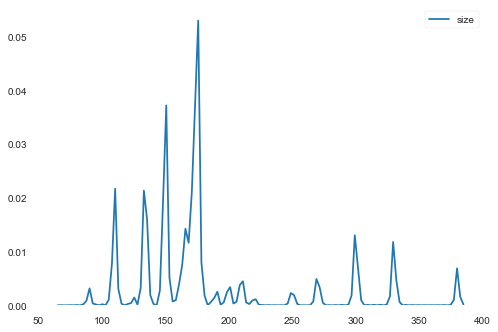

In [91]:
sns.kdeplot(df['size'])

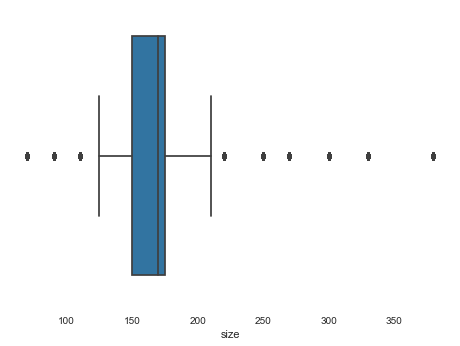

In [92]:
df_ot = df[df['size'] < df.size.max()]
sns.boxplot(df_ot['size'])

In [93]:
df_ot['size'].describe() # before outlier removal 

count    264836.000000
mean        182.427004
std          64.327196
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: size, dtype: float64

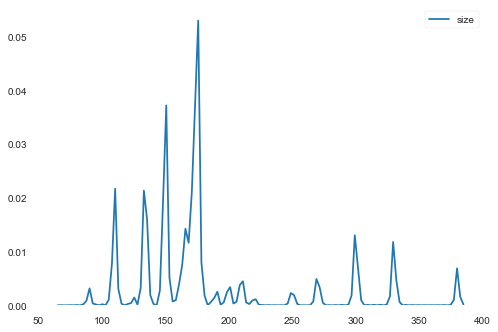

In [94]:
sns.kdeplot(df_ot['size'])

In [95]:
df_ot['size'].describe() # After outlier removal 

count    264836.000000
mean        182.427004
std          64.327196
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: size, dtype: float64

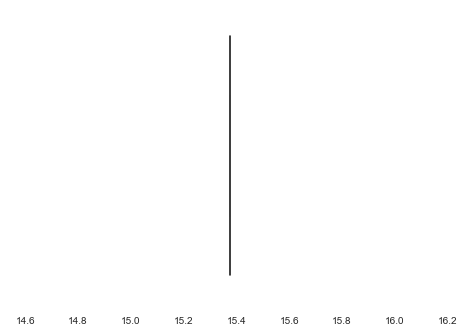

In [96]:
# Transforming the TOTAL SALES: 
sns.boxplot(np.log(df_ot.size))

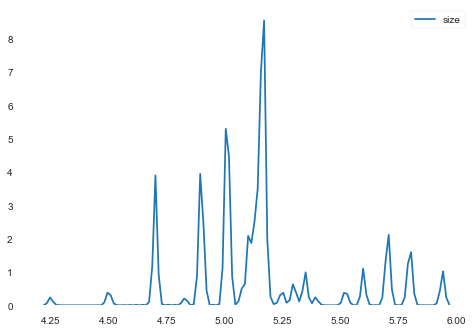

In [97]:
sns.kdeplot(np.log(df_ot['size'])); # 

In [98]:
df.dtypes

DATE                datetime64[ns]
STORE_NBR                   object
LYLTY_CARD_NBR              object
TXN_ID                      object
PROD_NBR                    object
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
day                         object
month                       object
year                        object
week                         int64
unit_price                 float64
size                         int32
brand                       object
flavour                     object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

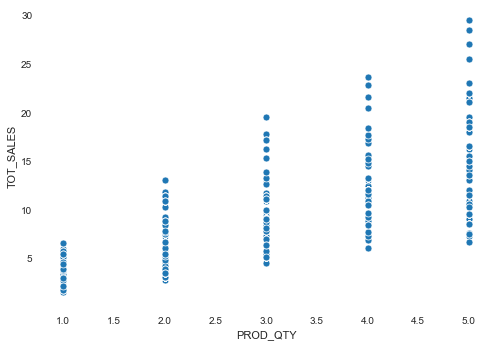

In [99]:
sns.scatterplot(df[df['PROD_QTY'] < df['PROD_QTY'].max()]['PROD_QTY'], df_ot['TOT_SALES']);

In [100]:
df.head() 

DATE STORE_NBR LYLTY_CARD_NBR TXN_ID PROD_NBR  \
0 2018-10-17         1           1000      1        5   
1 2019-05-14         1           1307    348       66   
2 2019-05-20         1           1343    383       61   
3 2018-08-17         2           2373    974       69   
4 2018-08-18         2           2426   1038      108   

                                  PROD_NAME  PROD_QTY  TOT_SALES        day  \
0           Natural Chip Compny SeaSalt175g         2        6.0  Wednesday   
1                     CCs Nacho Cheese 175g         3        6.3    Tuesday   
2     Smiths Crinkle Cut Chips Chicken 170g         2        2.9     Monday   
3     Smiths Chip Thinly S/Cream&Onion 175g         5       15.0     Friday   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   Saturday   

     month  year  week  unit_price  size                brand  \
0  October  2018    42        3.00   175  Natural Chip Compny   
1      May  2019    20        2.10   175                  CCs   
2      May  2019    21        1.45   170               Smiths   
3   August  2018    33        3.00   175               Smiths   
4   August  2018    33        4.60   150               Kettle   

                       flavour               LIFESTAGE PREMIUM_CUSTOMER  
0                     Sea salt   YOUNG SINGLES/COUPLES          Premium  
1                  NachoCheese  MIDAGE SINGLES/COUPLES           Budget  
2     CrinkleCutChips Chicken   MIDAGE SINGLES/COUPLES           Budget  
3     ChipThinlyS/Cream&Onion   MIDAGE SINGLES/COUPLES           Budget  
4  TortillaChpsHny&JlpnoChili   MIDAGE SINGLES/COUPLES           Budget

In [145]:
date_sales = pd.DataFrame(df.groupby('DATE')['TOT_SALES'].sum())
date_sales = date_sales.reset_index()
date_sales.head() 

DATE  TOT_SALES
0 2018-07-01     5372.2
1 2018-07-02     5315.4
2 2018-07-03     5321.8
3 2018-07-04     5309.9
4 2018-07-05     5080.9

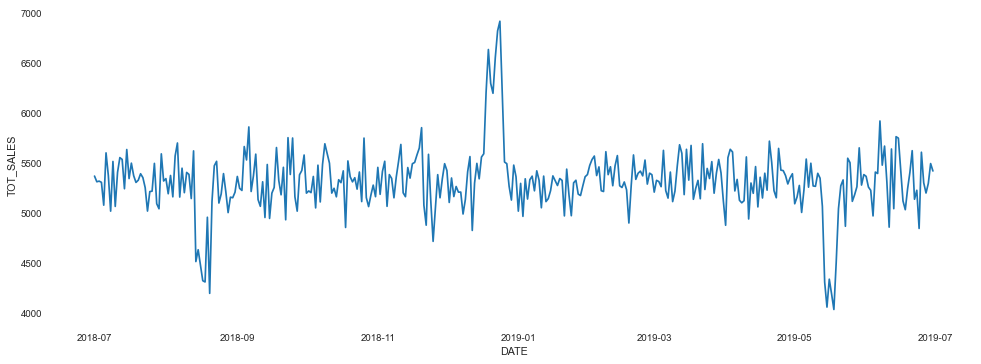

In [147]:
plt.figure(figsize=(17,6), dpi = 70)
sns.lineplot('DATE','TOT_SALES', data = date_sales );

We can see that there is a unusual high sale and drop in between in december. Lets examine. 

In [148]:
date_sales = pd.DataFrame(df.groupby('DATE')['TOT_SALES'].sum())
# date_sales = date_sales.reset_index()
date_sales.head() 

TOT_SALES
DATE                 
2018-07-01     5372.2
2018-07-02     5315.4
2018-07-03     5321.8
2018-07-04     5309.9
2018-07-05     5080.9

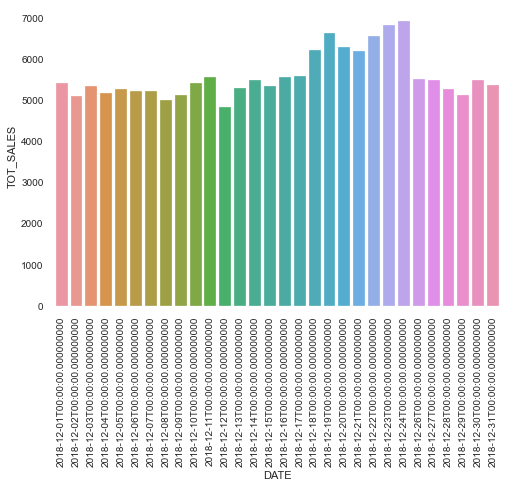

In [154]:
dec = date_sales.loc['2018-12-01':'2018-12-31']
dec = dec.reset_index() 
sns.barplot(x = 'DATE',y = 'TOT_SALES',data = dec)
plt.xticks(rotation = 90 );

Data for 25th december is missing

## Task 2 

- The client has selected store numbers 77, 86 and 88 as trial stores and want control stores to be established stores that are operational for the entire observation period. 

- We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of :
    - Monthly overall sales revenue
    - Monthly number of customers
    - Monthly number of transactions per customer